In [2]:
from Geometria import Punto, Linea, iguales

In [3]:
import matplotlib.pyplot as plt
from decorator import decorator

def acepta_listas(f):
    def inner(lista, axis=plt, *args, **kwargs):
        if isinstance(lista, list):
            r=[]
            for elemento in lista:
                r+=[f(elemento, axis, *args, **kwargs)]
            return r
        else:
            return f(lista, axis, *args, **kwargs)
    return inner

@acepta_listas
def grafica_punto(p: Punto, axis=plt, *args, **kwargs):
    return axis.scatter(p.x, p.y, *args, **kwargs)

#@acepta_listas
def grafica_linea(l: Linea, axis=plt, curva=None, *args, **kwargs):
    inf= 1000
    if not iguales(l.B, 0):
        def f(x):
            return -l.A/l.B*x - l.C/l.B
        x1, x2= -inf, inf
        y1, y2= f(x1), f(x2)
    else:
        x1, x2= [-l.C/l.A]*2
        y1, y2= -inf, inf
    if not curva:
        return axis.plot([x1,x2], [y1,y2], *args, **kwargs)
    else:
        curva.set_data([x1,x2], [y1,y2])

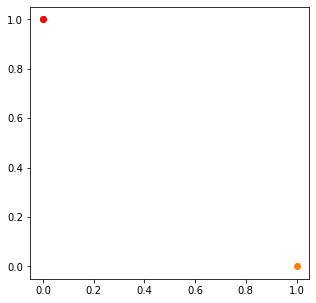

In [4]:
p1= Punto(0,1)
p2= Punto(1,0)
grafica_punto([p1, p2] )
grafica_punto(p1, color="r")

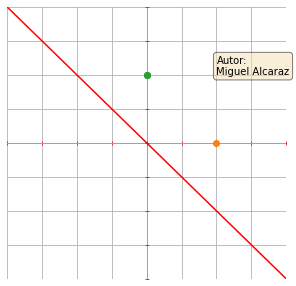

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["figure.figsize"] = (5,5)

fig= plt.figure() ## Regresa la figura para cambiar sus parámetros
ax1= fig.add_subplot(1,1,1)
ax1.grid("True")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines["left"].set_position(("data", 0))
ax1.spines["left"].set_color("red")
ax1.spines["left"].set_zorder(-1)
ax1.spines["bottom"].set_position(("data", 0))
ax1.spines["bottom"].set_color("red")
ax1.spines["bottom"].set_zorder(-1)
ax1.set_xlim([-2,2])
ax1.set_ylim([-2,2])
ax1.tick_params(labelleft= False, labelbottom=False, left=True, bottom=True,
               direction="inout", color="r", zorder=-1)
ax1.set_axisbelow(True)

p1= Punto(0,1)
p2= Punto(1,0)

#grafica_linea([Linea(A=1), Linea(A=0,B=1)], color="r", axis=ax1)
grafica_punto([p1, p2], axis=ax1, zorder=1)
grafica_punto(p1, axis=ax1)
grafica_linea(Linea(A=1,B=1, C=0), axis=ax1, color="r")

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
texto= "\n".join([r"Autor:", r"Miguel Alcaraz"])

_= ax1.text(1,1,texto, bbox=props)

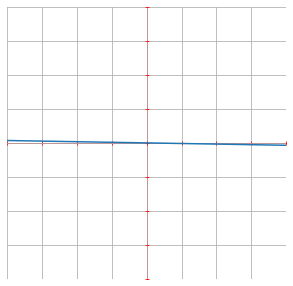

In [21]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig= plt.figure() ## Regresa la figura para cambiar sus parámetros
ax1= fig.add_subplot(1,1,1)
ax1.grid("True")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines["left"].set_position(("data", 0))
ax1.spines["left"].set_color("red")
ax1.spines["left"].set_zorder(-1)
ax1.spines["bottom"].set_position(("data", 0))
ax1.spines["bottom"].set_color("red")
ax1.spines["bottom"].set_zorder(-1)
ax1.set_xlim([-2,2])
ax1.set_ylim([-2,2])
ax1.tick_params(labelleft= False, labelbottom=False, left=True, bottom=True,
               direction="inout", color="r", zorder=-1)
ax1.set_axisbelow(True)



"""
l, = ax1.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])
"""
curva,= ax1.plot([],[])

def animate(i):
    theta=i*np.pi/180
    grafica_linea(Linea(Punto(0,0),Punto(np.cos(theta),np.sin(theta))), axis=ax1, curva=curva)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=180)

from IPython import display
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
#HTML(ani.to_jshtml())
#HTML(ani.to_html5_video()) #requiere instalar ffmpeg (conda install -c conda-forge ffmpeg)

ani.save("1.mp4", fps=100)